In [ ]:
#Cars4U_Git

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed
down in the recent past, the pre-owned car market has continued to grow over the past years and is
larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this
market.
In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars
were bought and sold. There is a slowdown in new car sales and that could mean that the demand is
shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned
cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and
managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come
into play only in the last stage of the customer journey), used cars are very different beasts with huge
uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars
becomes important in order to grow in the market.

The Questions are:
1. What price should a used car be listed and finally sold for?
2. How long the price should be maintained until ground truth data (realtime data) can be used to adjust the prices upwards, downward or maintained.
3. What cars should we seek to invest in for our inventory.

Data Description:

The data contains the different attributes of used cars sold in different locations. The detailed datadictionary is given below.

Data Dictionary

1. S.No.: Serial number
2. Name: Name of the car which includes brand name and model name
3. Location: Location in which the car is being sold or is available for purchase (cities)
4. Year: Manufacturing year of the car
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission: The type of transmission used by the car (Automatic/Manual)
8. Owner: Type of ownership
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: The maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. Price: The price of the used car in INR Lakhs

In [1]:
#Importing the necessary libraries

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore') # To supress warnings

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('used_cars_data.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

# Data Overview

The initial steps to get an overview of any dataset is to:

observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
get information about the number of rows and columns in the dataset
find out the data types of the columns to ensure that data is stored in the preferred format and the value of each car is as expected.
check the statistical summary of the dataset to get an overview of the numerical columns of the data

Displaying the first few rows of the dataset

In [5]:
# looking at head (5 observations) 
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [6]:
df.shape

(7253, 14)

In [7]:
#We can see that the Serial No. Column provides no value so we drop
df.drop(['S.No.'],axis=1,inplace=True)

In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


Checking the shape of the dataset

In [9]:
df.shape

(7253, 13)

The dataset has 7253 rows and 13 columns

# Checking the data types of the columns for the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


# Getting the statistical summary for the dataset

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets check for duplicates and drop

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


In [13]:
df.duplicated().sum()

1

In [14]:
print('Shape of dataset before dropping dups:', df.shape)
print('Dropping duplicate and retaining last occurrence')
df.drop_duplicates(keep='last',inplace=True)
print('Dropping complete')
print('Confirming if duplicate still exist in file')
print('Number of duplicates in dataset:',df.duplicated().sum())
print('Shape of dataset after dropping dups:', df.shape)

Shape of dataset before dropping dups: (7253, 13)
Dropping duplicate and retaining last occurrence
Dropping complete
Confirming if duplicate still exist in file
Number of duplicates in dataset: 0
Shape of dataset after dropping dups: (7252, 13)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.2+ KB


# Lets check for Unique Values

In [16]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 385
Seats                   9
New_Price             643
Price                1373
dtype: int64

# Missing Values

In [17]:
print('Missing values:\n')
print(df.isnull().sum())
print('\nMissing values(%):\n')
print(df.isnull().sum() * 100 / len(df))

Missing values:

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
dtype: int64

Missing values(%):

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027579
Engine                0.634308
Power                 2.413127
Seats                 0.730833
New_Price             0.000000
Price                17.002206
dtype: float64


In [18]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1233
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

# Categorical Variables

In [19]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("#" * 100)

Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
####################################################################################################
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
####################################################################################################
Manual       5203
Automatic    2049
Name: Transmission, dtype: int64
####################################################################################################
5.0     6046
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
####################################################################################################
2015    929
2014    925
2016    886
2013  

# Seats

In [20]:
df[df['Seats'].isna()].Name.value_counts()

Maruti Swift 1.3 VXi                            8
BMW 5 Series 520d Sedan                         7
Hyundai Santro GLS II - Euro II                 4
Maruti Estilo LXI                               3
Honda City 1.5 GXI                              3
Maruti Swift 1.3 LXI                            2
Toyota Etios Liva V                             2
Land Rover Range Rover 3.0 D                    2
Fiat Punto 1.4 Emotion                          2
Hyundai Santro Xing XG                          2
Maruti Swift 1.3 ZXI                            1
Fiat Punto 1.3 Emotion                          1
Mahindra TUV 300 P4                             1
Hyundai i20 new Sportz AT 1.4                   1
Toyota Etios Liva Diesel TRD Sportivo           1
Skoda Laura 1.8 TSI Ambition                    1
Fiat Punto 1.2 Dynamic                          1
Honda Jazz Select Edition                       1
Ford Endeavour Hurricane LE                     1
Honda CR-V AT With Sun Roof                     1


Looking at Seats lets check for 0 and Nan Values

In [21]:
print('Records with Seats 0')
df[df['Seats']==0.0]

Records with Seats 0


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0,53.14,18.0


Since one car has 0 seats we will impute with the Median of 5 from Statistcal Summary Above

In [22]:
df.loc[df['Seats'] == 0.0, 'Seats'] = 5.0
print('\n Lets check if the imputation is complete \n')
display(df[df['Seats']==0.0])
display(df[df['Name']=='Audi A4 3.2 FSI Tiptronic Quattro'])


 Lets check if the imputation is complete 



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,5.0,53.14,18.0


In [23]:
df.loc[df['Seats'] == 0.0, 'Seats'] = 5.0

display(df[df['Seats']==0.0])
display(df[df['Name']=='Audi A4 3.2 FSI Tiptronic Quattro'])

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,5.0,53.14,18.0


In [24]:
#Cars with NaN Seat values
df[df['Seats'].isna()].reset_index()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
1,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
2,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,7.650,3.60
3,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
4,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
5,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
6,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
7,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
8,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
9,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,13.580,1.70


In [25]:
print('Imputing median value for Seats with Nan values:')
df['Seats'].fillna(df['Seats'].median(), inplace=True)
print('Imputing done. Lets check if any of records have Nan Seats')
print(df[df['Seats'].isna()].count().sum())
print('Unique Seat values:')
df['Seats'].value_counts()

Imputing median value for Seats with Nan values:
Imputing done. Lets check if any of records have Nan Seats
0
Unique Seat values:


5.0     6100
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7252 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.2+ KB


# Processing Mileage Engine and Power to Numeric

We will convert Mileage, Engine and Power to Numeric

In [27]:
df[['Mileage','Engine','Power']]

,Mileage,Engine,Power
0,26.6 km/kg,998 CC,58.16 bhp
1,19.67 kmpl,1582 CC,126.2 bhp
2,18.2 kmpl,1199 CC,88.7 bhp
3,20.77 kmpl,1248 CC,88.76 bhp
4,15.2 kmpl,1968 CC,140.8 bhp
...,...,...,...
7248,20.54 kmpl,1598 CC,103.6 bhp
7249,17.21 kmpl,1197 CC,103.6 bhp
7250,23.08 kmpl,1461 CC,63.1 bhp
7251,17.2 kmpl,1197 CC,103.6 bhp


In [28]:
#Similarly lets update Mileage and Engine too.
df['Mileage'] = df['Mileage'].replace(regex='kmpl',value='') 
df['Mileage'] = df['Mileage'].replace(regex='km/kg',value='') #Mileage has 2 units

In [29]:
df[['Mileage','Engine','Power']]

,Mileage,Engine,Power
0,26.6,998 CC,58.16 bhp
1,19.67,1582 CC,126.2 bhp
2,18.2,1199 CC,88.7 bhp
3,20.77,1248 CC,88.76 bhp
4,15.2,1968 CC,140.8 bhp
...,...,...,...
7248,20.54,1598 CC,103.6 bhp
7249,17.21,1197 CC,103.6 bhp
7250,23.08,1461 CC,63.1 bhp
7251,17.2,1197 CC,103.6 bhp


In [30]:
df['Engine'] = df['Engine'].replace(regex='CC',value='') 

In [31]:
df[['Mileage','Engine','Power']]

,Mileage,Engine,Power
0,26.6,998,58.16 bhp
1,19.67,1582,126.2 bhp
2,18.2,1199,88.7 bhp
3,20.77,1248,88.76 bhp
4,15.2,1968,140.8 bhp
...,...,...,...
7248,20.54,1598,103.6 bhp
7249,17.21,1197,103.6 bhp
7250,23.08,1461,63.1 bhp
7251,17.2,1197,103.6 bhp


In [32]:
df['Power'] = df['Power'].replace(regex='bhp',value='') 

In [33]:
df[['Mileage','Engine','Power']]

,Mileage,Engine,Power
0,26.6,998,58.16
1,19.67,1582,126.2
2,18.2,1199,88.7
3,20.77,1248,88.76
4,15.2,1968,140.8
...,...,...,...
7248,20.54,1598,103.6
7249,17.21,1197,103.6
7250,23.08,1461,63.1
7251,17.2,1197,103.6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7252 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.2+ KB


In [35]:
#converting the fields type to float  
df["Mileage"] = df["Mileage"].astype("float")
df["Power"] = df["Power"].astype("float")
df["Engine"] = df["Engine"].astype("float")

#check the type after conversion
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [36]:
#Let's check if there are any bad data in the dataset for Mileage, Engine and Power
print('Mileage with 0.0:',df[df['Mileage']==0.0]['Mileage'].count())
print('Engine with 0.0:',df[df['Engine']==0.0]['Engine'].count())
print('Power with 0.0:',df[df['Power']==0.0]['Power'].count())

Mileage with 0.0: 81
Engine with 0.0: 0
Power with 0.0: 0


Since Mileage has some zero values we will convert them to Nan

In [37]:
df.loc[df["Mileage"]=='0.0','Mileage']=np.nan

In [38]:
#Let's check if there are any bad data in the dataset for Mileage, Engine and Power
print('Mileage with 0.0:',df[df['Mileage']==0.0]['Mileage'].count())
print('Engine with 0.0:',df[df['Engine']==0.0]['Engine'].count())
print('Power with 0.0:',df[df['Power']==0.0]['Power'].count())

Mileage with 0.0: 81
Engine with 0.0: 0
Power with 0.0: 0


In [39]:
#Missing values in Mileage, Engine and Power
df.loc[df["Mileage"]==0.0,'Mileage']=np.nan
df[['Mileage','Engine','Power']].isnull().sum()


Mileage     83
Engine      46
Power      175
dtype: int64

In [40]:
df.query("Mileage == '0.0'")['Mileage'].count()

0

In [41]:
df.query("Engine == '0.0'")['Engine'].count()

0

In [42]:
df.query("Power == '0.0'")['Power'].count()

0

In [43]:
df.loc[df["Mileage"]==0.0,'Mileage']=np.nan

print('Missing values in Mileage, Engine and Power')
df[['Mileage','Engine','Power']].isnull().sum()

Missing values in Mileage, Engine and Power


Mileage     83
Engine      46
Power      175
dtype: int64

In [44]:
df.groupby(['Name','Year'])['Mileage'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003    12.80
Audi A3 35 TDI Attraction                      2014    20.38
Audi A3 35 TDI Premium                         2016    20.38
Audi A3 35 TDI Premium Plus                    2015    20.38
                                               2016    20.38
Audi A3 35 TDI Technology                      2017    20.38
Audi A4 1.8 TFSI                               2010    12.30
                                               2011    12.30
Audi A4 1.8 TFSI Technology Edition            2012    15.64
Audi A4 2.0 TDI                                2009    16.55
                                               2011    16.55
                                               2012    16.55
                                               2013    16.55
                                               2014    16.55
Audi A4 2.0 TDI 177 Bhp Premium Plus           2013    17.11
                                 

In [45]:
df.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003    1489.0
Audi A3 35 TDI Attraction                      2014    1968.0
Audi A3 35 TDI Premium                         2016    1968.0
Audi A3 35 TDI Premium Plus                    2015    1968.0
                                               2016    1968.0
Audi A3 35 TDI Technology                      2017    1968.0
Audi A4 1.8 TFSI                               2010    1781.0
                                               2011    1781.0
Audi A4 1.8 TFSI Technology Edition            2012    1798.0
Audi A4 2.0 TDI                                2009    1968.0
                                               2011    1968.0
                                               2012    1968.0
                                               2013    1968.0
                                               2014    1968.0
Audi A4 2.0 TDI 177 Bhp Premium Plus           2013    1968.0
                  

In [46]:
df.groupby(['Name','Year'])['Power'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003     35.50
Audi A3 35 TDI Attraction                      2014    143.00
Audi A3 35 TDI Premium                         2016    143.00
Audi A3 35 TDI Premium Plus                    2015    143.00
                                               2016    143.00
Audi A3 35 TDI Technology                      2017    143.00
Audi A4 1.8 TFSI                               2010    163.20
                                               2011    163.20
Audi A4 1.8 TFSI Technology Edition            2012    167.62
Audi A4 2.0 TDI                                2009    147.51
                                               2011    147.51
                                               2012    147.51
                                               2013    147.51
                                               2014    147.51
Audi A4 2.0 TDI 177 Bhp Premium Plus           2013    174.33
                  

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7169 non-null   float64
 8   Engine             7206 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7252 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 793.2+ KB


In [48]:
#For Mileage, Engine and Power, we will impute the median of the respective Brands.
#Creating 2 new variables BRAND and MODEL from Name and drop the Name

df['Brand'] = df['Name'].str.split(' ', n=1, expand=True)[0]
df['Model'] = df['Name'].str.split(' ', n=1, expand=True)[1]
df.drop(['Name'], axis=1, inplace=True)

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7169 non-null   float64
 7   Engine             7206 non-null   float64
 8   Power              7077 non-null   float64
 9   Seats              7252 non-null   float64
 10  New_Price          7252 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 849.8+ KB


None

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic


In [49]:
print('Imputing median values based on Brand for Mileage, Engine, Power')
df['Engine'] = df.groupby(['Brand'])['Engine'].apply(lambda val:val.fillna(val.median()))
df['Mileage'] = df.groupby(['Brand'])['Mileage'].apply(lambda val:val.fillna(val.median()))
df['Power'] = df.groupby(['Brand'])['Power'].apply(lambda val:val.fillna(val.median()))
print('After Imputing')
df[['Mileage','Engine','Power']].isnull().sum()

Imputing median values based on Brand for Mileage, Engine, Power
After Imputing


Mileage    1
Engine     0
Power      2
dtype: int64

In [50]:
#Check records with Nan in Mileage

In [51]:
display(df[df['Mileage'].isnull()])

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,11.3,3.0,Smart,Fortwo CDI AT


In [52]:
#Check records with Nan in Power

In [53]:
display(df[df['Power'].isnull()])


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,11.3,3.0,Smart,Fortwo CDI AT
6216,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,11.3,NaN,Hindustan,Motors Contessa 2.0 DSL


In [54]:
print('Imputing median for missing Mileage\n')
df.loc[df['Mileage'].isnull(), 'Mileage'] = df['Mileage'].median()

df.isnull().sum()

Imputing median for missing Mileage



Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                   0
New_Price               0
Price                1233
Brand                   0
Model                   0
dtype: int64

In [55]:
print('Imputing median for missing Power\n')
df.loc[df['Power'].isnull(), 'Power'] = df['Power'].median()
print('After Imputing, Missing values in the variables')
df.isnull().sum()

Imputing median for missing Power

After Imputing, Missing values in the variables


Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1233
Brand                   0
Model                   0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7252 non-null   float64
 7   Engine             7252 non-null   float64
 8   Power              7252 non-null   float64
 9   Seats              7252 non-null   float64
 10  New_Price          7252 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 849.8+ KB


# Categoricals

In [57]:
#Barplots for categorical variables

def bar_plot(data, z):
    """
    This function will barplot the categorial feature.Adds % at the top
    """
    total = len(data[z])  # length of the column
    plt.figure(figsize=(18, 6))   #Plot size
    plt.xticks(rotation=45)     #Rotate the x axis variables to 45 degree
    plt.title( z + ' Plot',fontweight='bold')    #title of the plot
    #plot countplot.  
    ax = sns.countplot(
            data[z], 
            palette="hls", 
            order=data[z].value_counts(ascending=False).index #Sorting the variable count in descending order
    )   #i.e the variable with highest count appears in the left side of plot, followed by others in descending order
    for p in ax.patches:                       
        percentage = "{:.1f}%".format(100 * p.get_height() / total)  # % of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

# Location

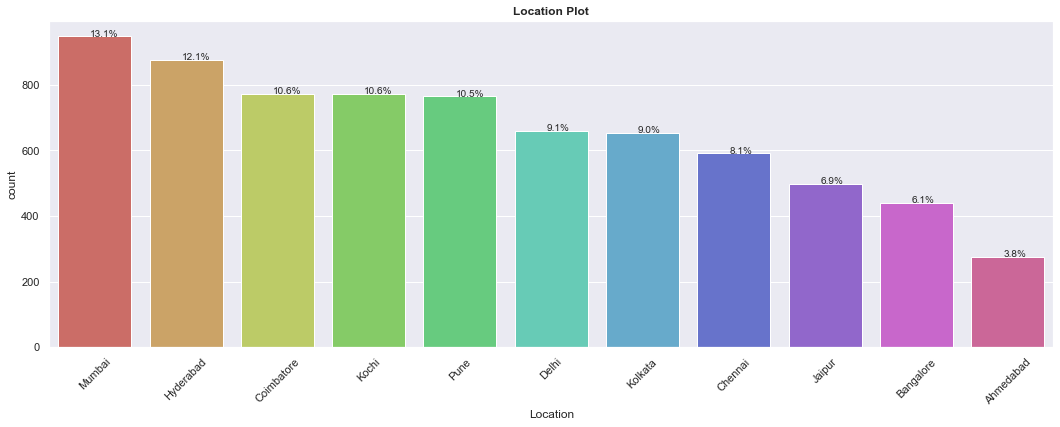

In [58]:
bar_plot(df,"Location")

Mumbai has the highest sales and then Dekhi somewhere in the middle and then ending with Bangalore and Ahmedabad

# Fuel_Type

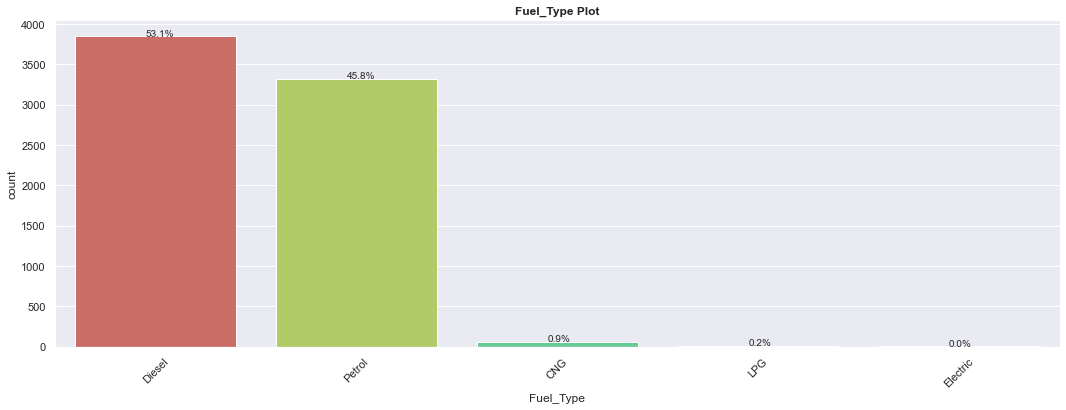

In [59]:
bar_plot(df,"Fuel_Type")

Diesel is the most popular fuel followed closely by Petrol (together accounting for over 98%)with electric being last. This can be misleading because the world is embracing electric vehicles as it becomes more economical. 

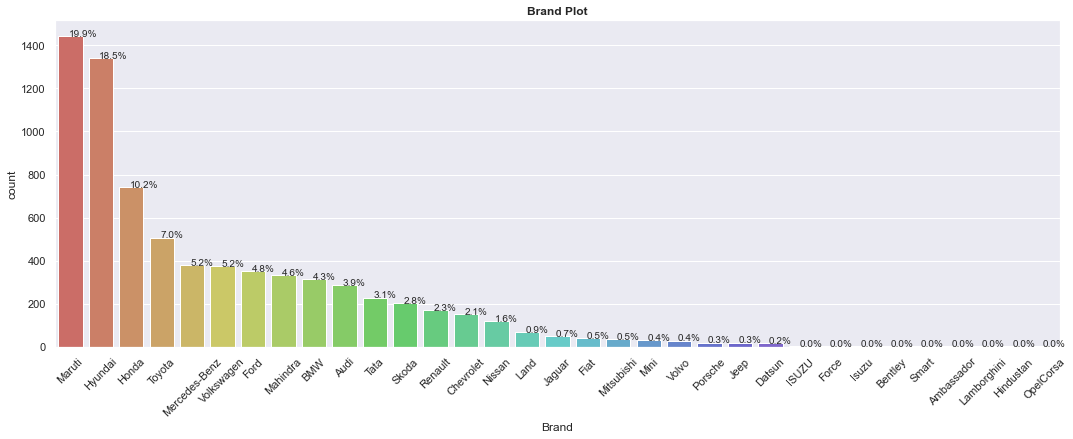

In [62]:
bar_plot(df,"Brand")

Not surprsingly Maruti is the most popular brand followed by Hyundai, Honda, Toyota, Mercedes, Volkswagen and Ford

# Transmission

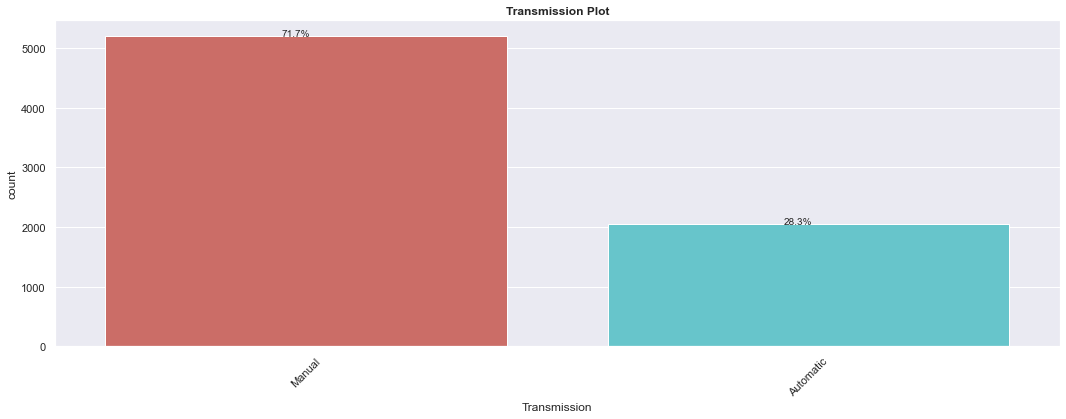

In [63]:
bar_plot(df,"Transmission")

In [64]:
Manual Cars are the most popular outselling Automatic about 2 to 1. This could be the ease of maintenance and cheaper price of manual cars.

SyntaxError: invalid syntax (Temp/ipykernel_20116/3684828752.py, line 1)

# Owner_Type

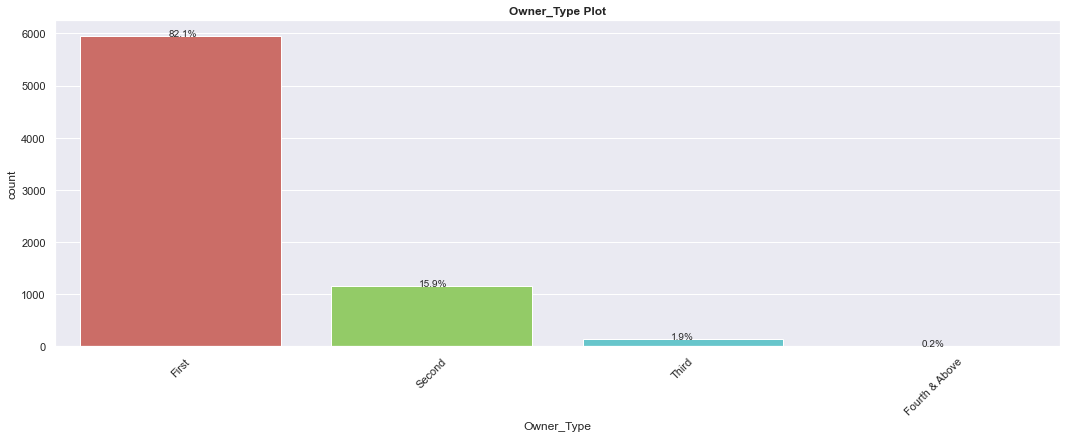

In [65]:
bar_plot(df,"Owner_Type")

# Seats

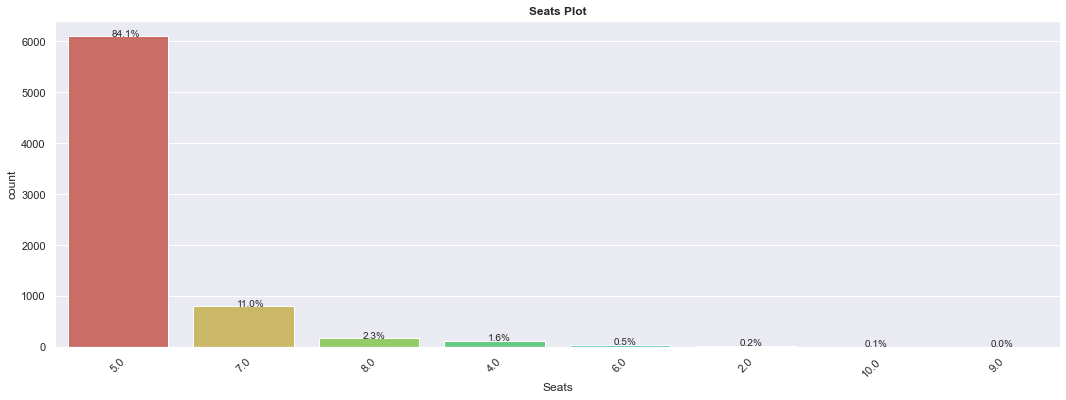

In [66]:
bar_plot(df,"Seats")

# Continous

# Year,Kilometers_Driven,Mileage,Engine,Power,Price

In [67]:
#For Univariate analysis, let's write a function to combine boxplot and histplot in same space one below other 
#so that we could visualize outliers & distributions

def hist_box_plot(feature, figsize=(15, 6), bins=None):
    """Boxplot and histogram combined. Input is Numerical feature
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
                                            nrows=2,  # Number of rows of the subplot grid= 2
                                            sharex=True,  # x-axis will be shared among all subplots
                                            gridspec_kw={"height_ratios": (0.25, 0.75)},
                                            figsize=figsize,
                                          )  # creating the 2 subplots
    
    # For boxplot. Marker indicates mean value of column.  
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color="yellow")  
    
    # For histogram
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins, color='violet')
    
    ax_hist2.axvline(feature.mean(), color="green", linestyle="--", label='Mean')  # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color="red", linestyle="-", label='Median')  # Add median to the histogram
    
    plt.legend() #display legend

# Year

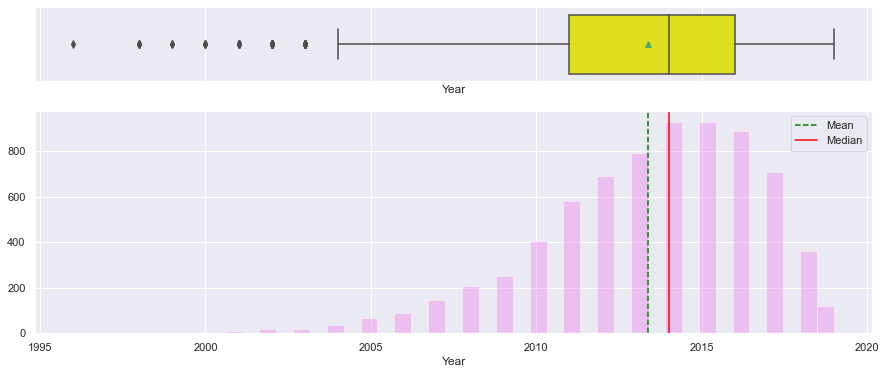

In [68]:
hist_box_plot(df['Year'])

1. The are outliers on the lower side.
2. The data are "skewed to the left", with a long tail of low scores pulling the mean down more than the median.
3. Used Car prices start rising for year 2010 to 2015 and start moving downwards.

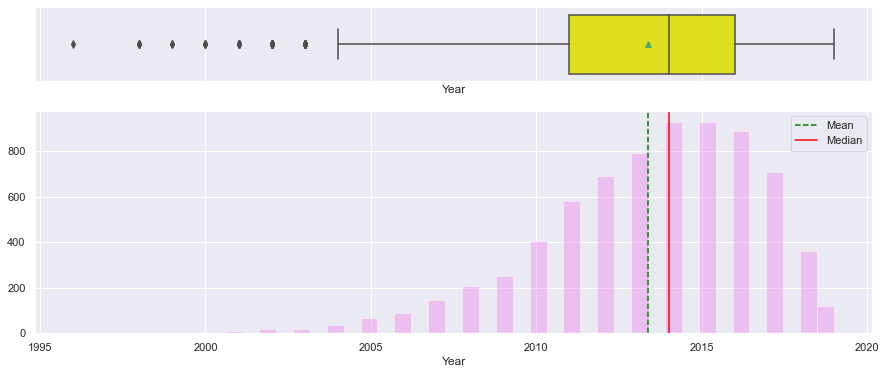

In [69]:
hist_box_plot(df['Year'])

# Kilometers_Driven

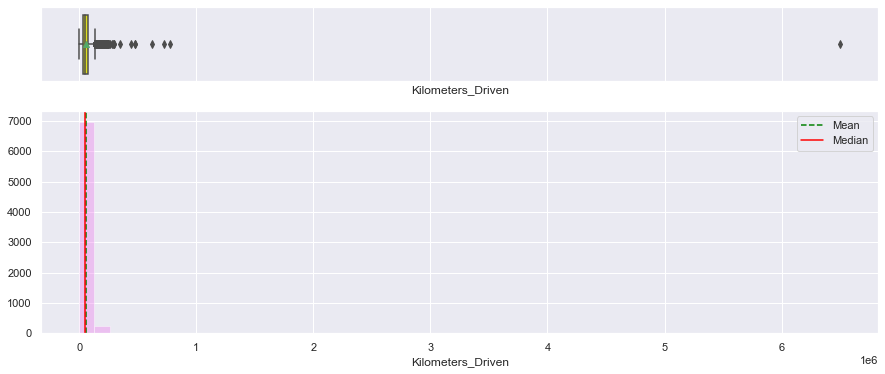

In [70]:
hist_box_plot(df['Kilometers_Driven'])

In [71]:
This is heavily skewed to higher side.

SyntaxError: invalid syntax (Temp/ipykernel_20116/797705966.py, line 1)

# Mileage

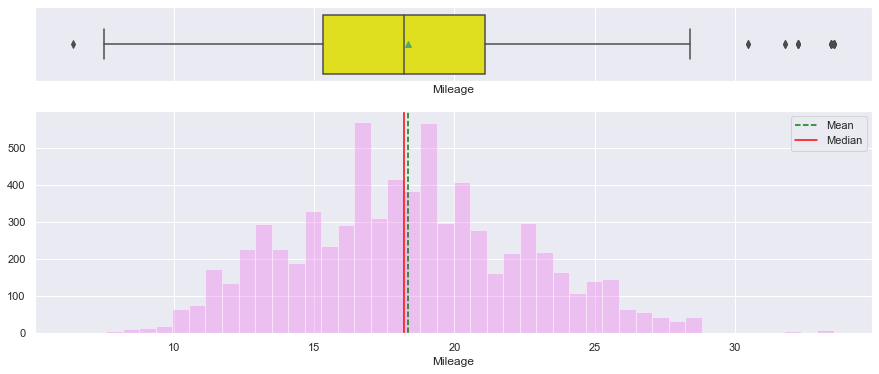

In [72]:
hist_box_plot(df['Mileage'])

Mileage has a somewhat normal distribution with Mileage between 15 and 20 being popular

# Engine

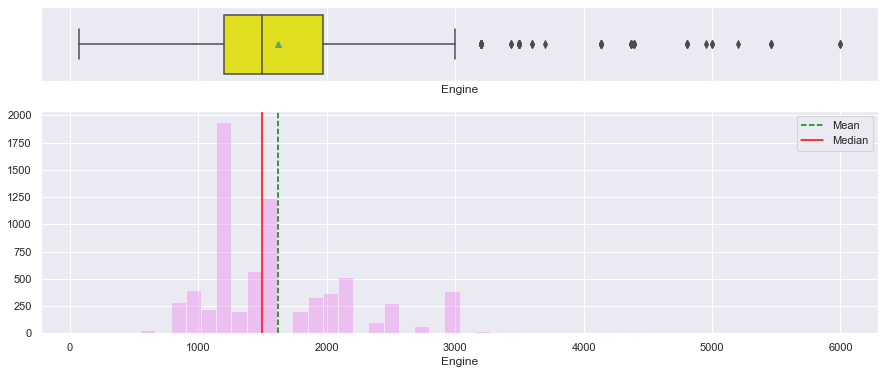

In [73]:
hist_box_plot(df['Engine'])

1. The mean is greater than median with quite a number of outliers on the higher side making it positively skewed.


# Power

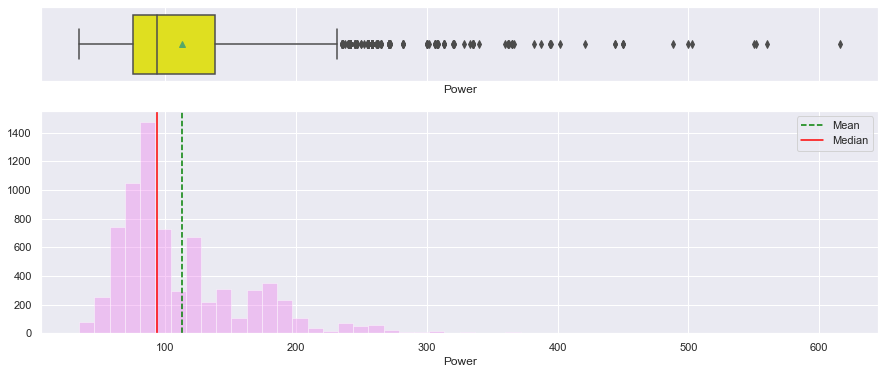

In [74]:
hist_box_plot(df['Power'])

The mean is greater than median with quite a number of outliers on the higher side making it positively skewed.

# Price

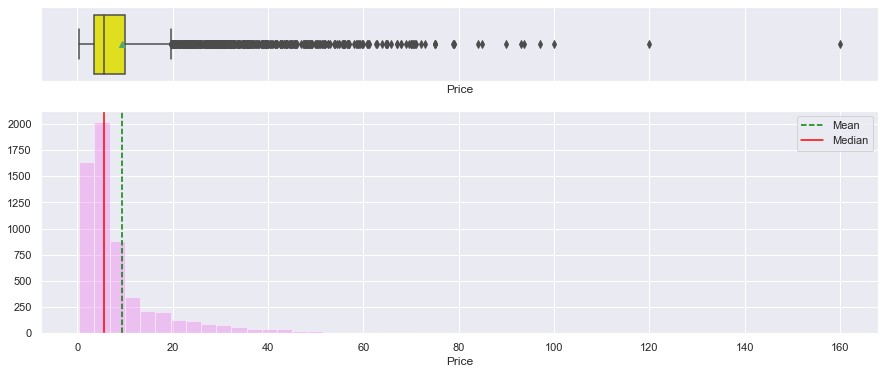

In [75]:
hist_box_plot(df['Price'])

The mean is greater than median with a high number of outliers on the higher side making it positively skewed.

The ggplot shows a canvas view of the variables Year, Kilometers_Driven, Mileage,Engine, Power, Seats, New_Price and Price

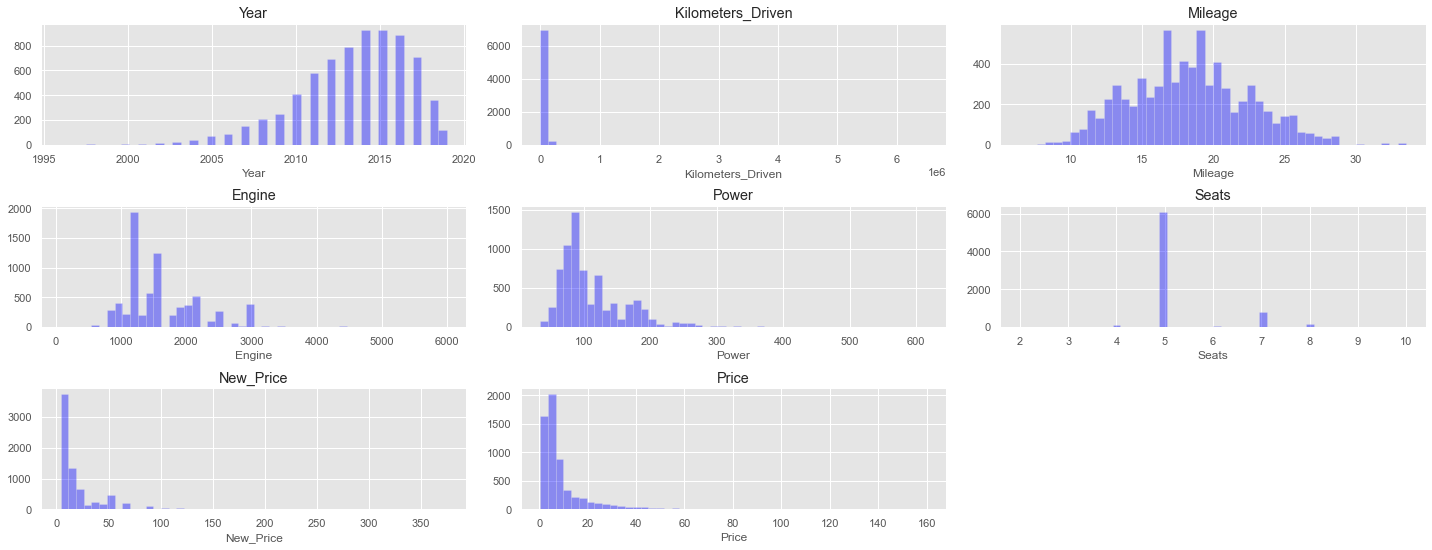

In [76]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

# Bivariate & Multivariate Analysis

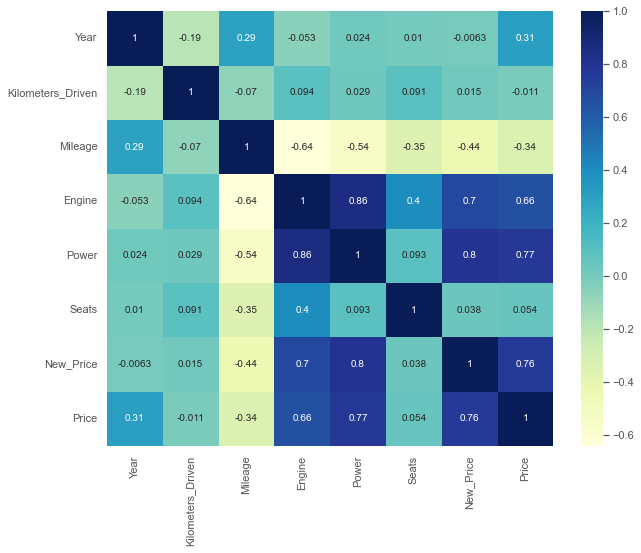

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

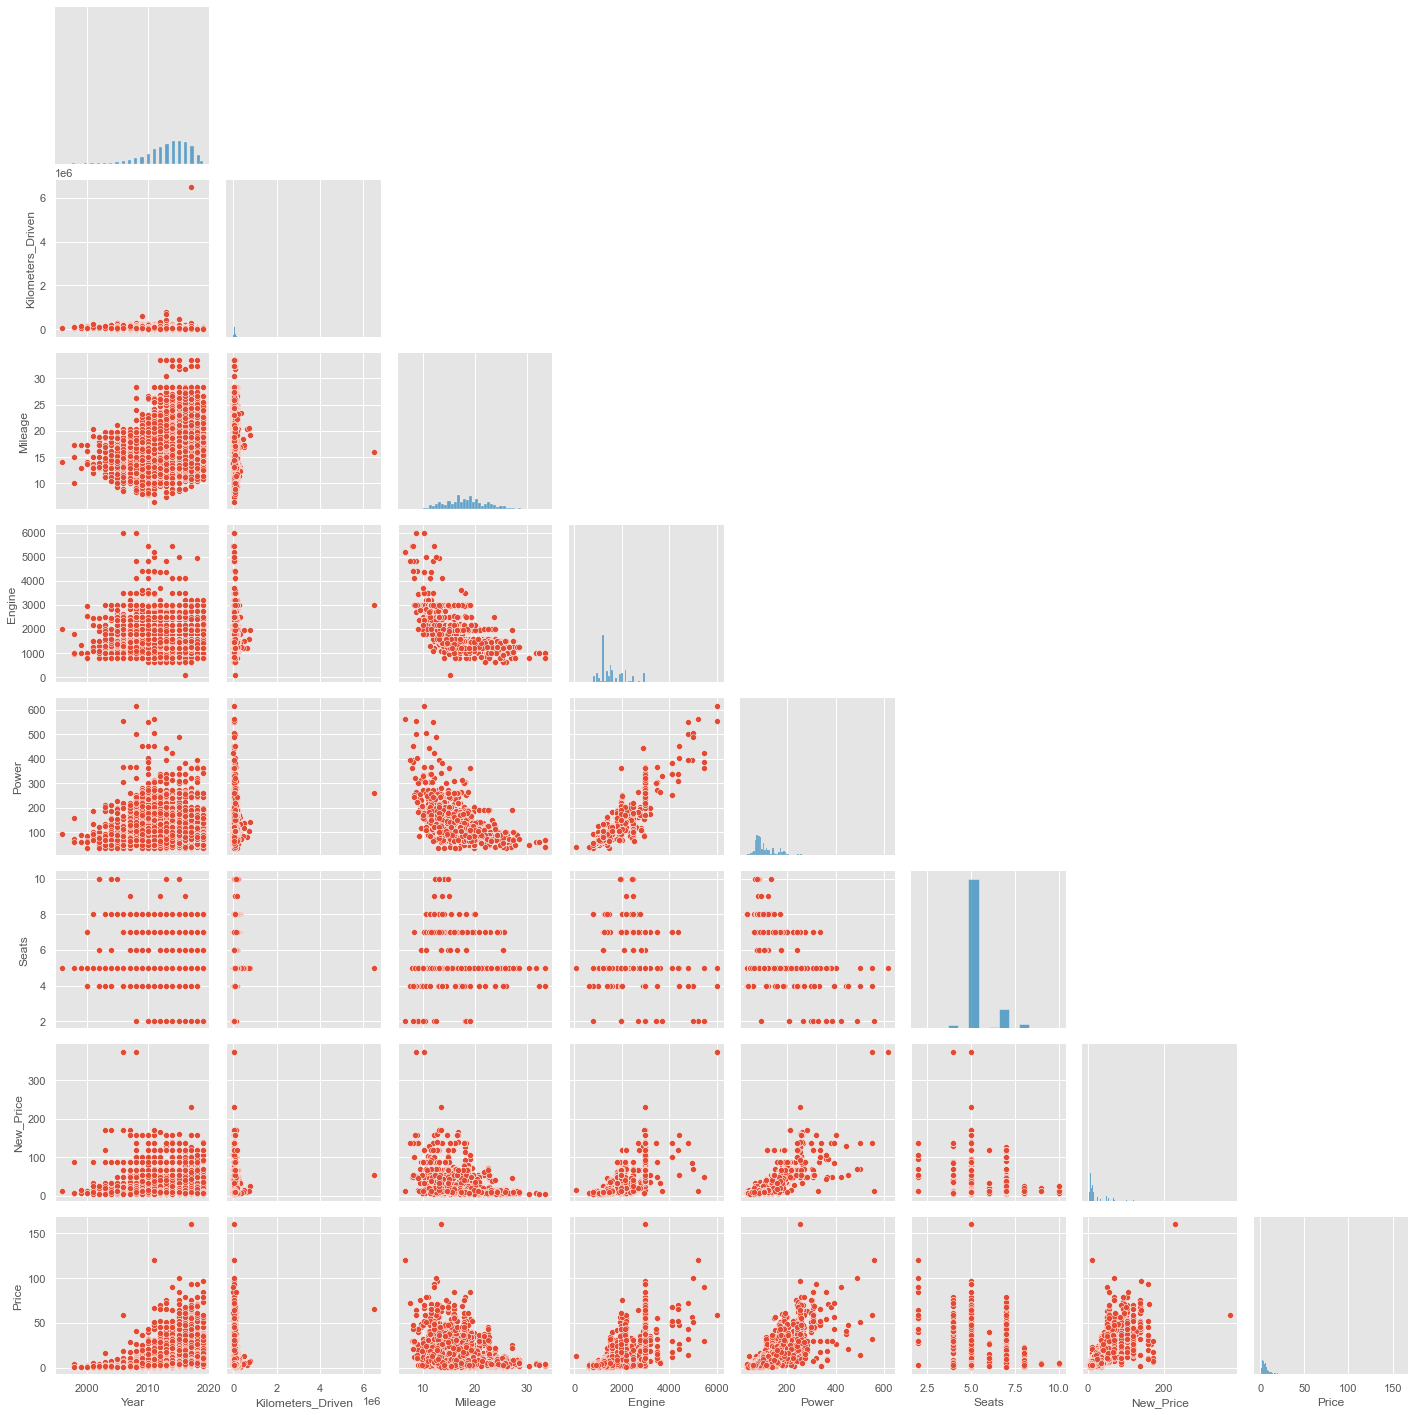

In [78]:
sns.pairplot(data=df , corner=True)
plt.show()

# Pairplot

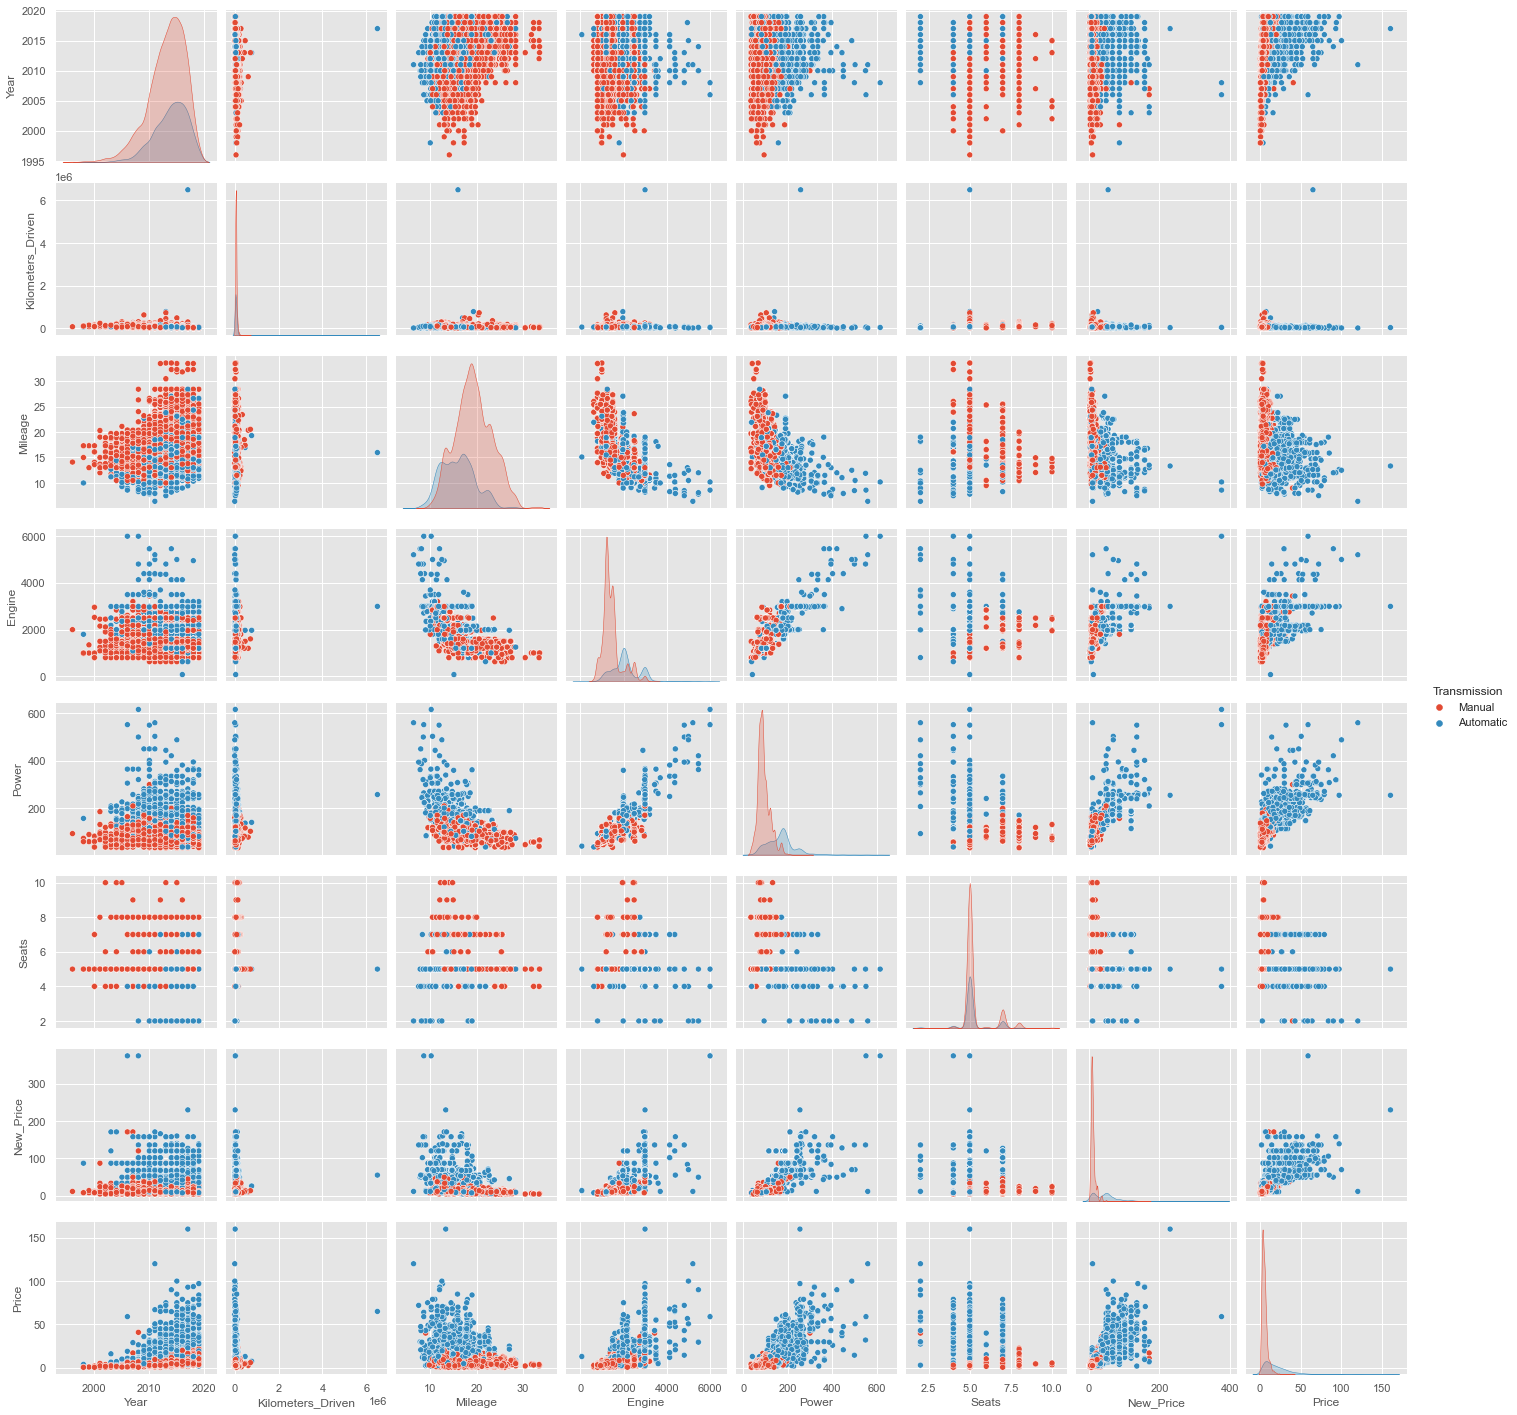

In [79]:
#Generating pairplot to show correlation between numeric variables
sns.pairplot(df, hue='Transmission')
plt.show()

# Correlation matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187884,0.294984,-0.052730,0.024267,0.010474,-0.006323,0.305327
Kilometers_Driven,-0.187884,1.000000,-0.069669,0.094480,0.028595,0.090769,0.015497,-0.011493
Mileage,0.294984,-0.069669,1.000000,-0.641411,-0.541821,-0.347405,-0.440351,-0.336361
Engine,-0.052730,0.094480,-0.641411,1.000000,0.857390,0.401945,0.695735,0.658644
Power,0.024267,0.028595,-0.541821,0.857390,1.000000,0.093424,0.803691,0.773166
Seats,0.010474,0.090769,-0.347405,0.401945,0.093424,1.000000,0.038215,0.053787
New_Price,-0.006323,0.015497,-0.440351,0.695735,0.803691,0.038215,1.000000,0.763362
Price,0.305327,-0.011493,-0.336361,0.658644,0.773166,0.053787,0.763362,1.000000


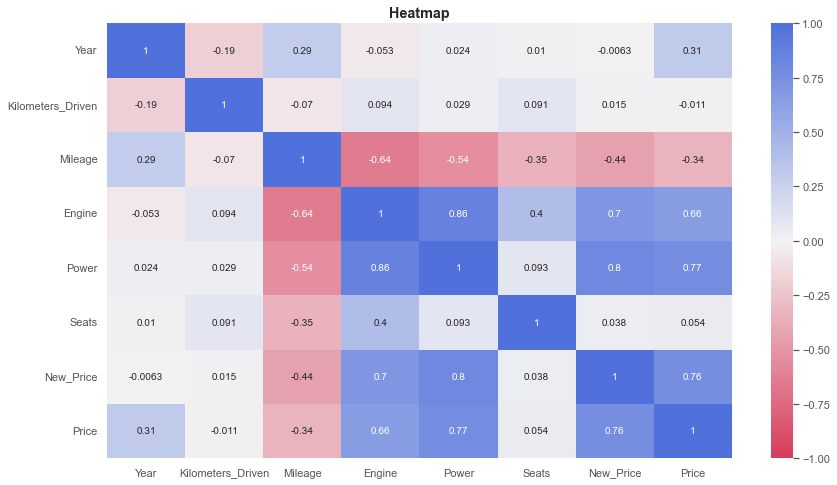

In [80]:
#Check the correlation of numeric variables and generate heatmap

plt.figure(figsize = (14,8))
#create your own palette to show positive values in blue and negative values in red
cmap=sns.diverging_palette(5, 260, as_cmap=True)
#plot heatmap
sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Heatmap', fontweight='bold')         #Chart title

#Correlation matrix
df.corr()

Looking at the Heatmap there is a High Positive Correlation between

1. Power and Engine - 86%
2. Power and New Price - 80%
3. Power and Price - 77%


# Price and Seats

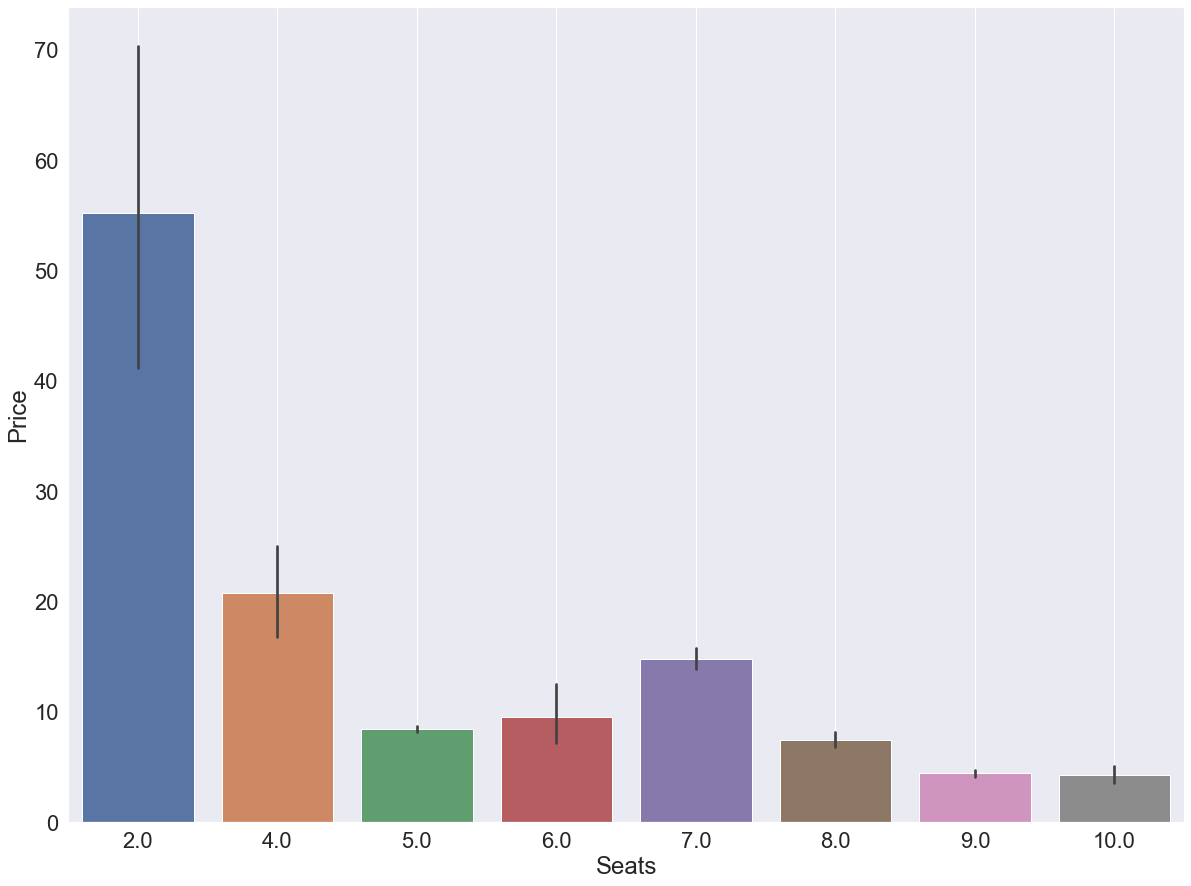

In [81]:
#Price and Seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=df)
plt.grid()

Two seater cars are most expensive followed by 4 seater and least expensive are 10 seaters.

# Price and Brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Lamborghini'),
  Text(1, 0, 'Bentley'),
  Text(2, 0, 'Porsche'),
  Text(3, 0, 'Land'),
  Text(4, 0, 'Jaguar'),
  Text(5, 0, 'Mini'),
  Text(6, 0, 'Mercedes-Benz'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'BMW'),
  Text(9, 0, 'Isuzu'),
  Text(10, 0, 'Volvo'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'ISUZU'),
  Text(13, 0, 'Toyota'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Force'),
  Text(16, 0, 'Mahindra'),
  Text(17, 0, 'Skoda'),
  Text(18, 0, 'Ford'),
  Text(19, 0, 'Renault'),
  Text(20, 0, 'Honda'),
  Text(21, 0, 'Hyundai'),
  Text(22, 0, 'Volkswagen'),
  Text(23, 0, 'Nissan'),
  Text(24, 0, 'Maruti'),
  Text(25, 0, 'Tata'),
  Text(26, 0, 'Fiat'),
  Text(27, 0, 'Datsun'),
  Text(28, 0, 'Chevrolet'),
  Text(29, 0, 'Smart'),
  Text(30, 0, 'Ambassador'),
  Text(31, 0, 'OpelCorsa'),
  Text(32, 0, 'Hindustan')])

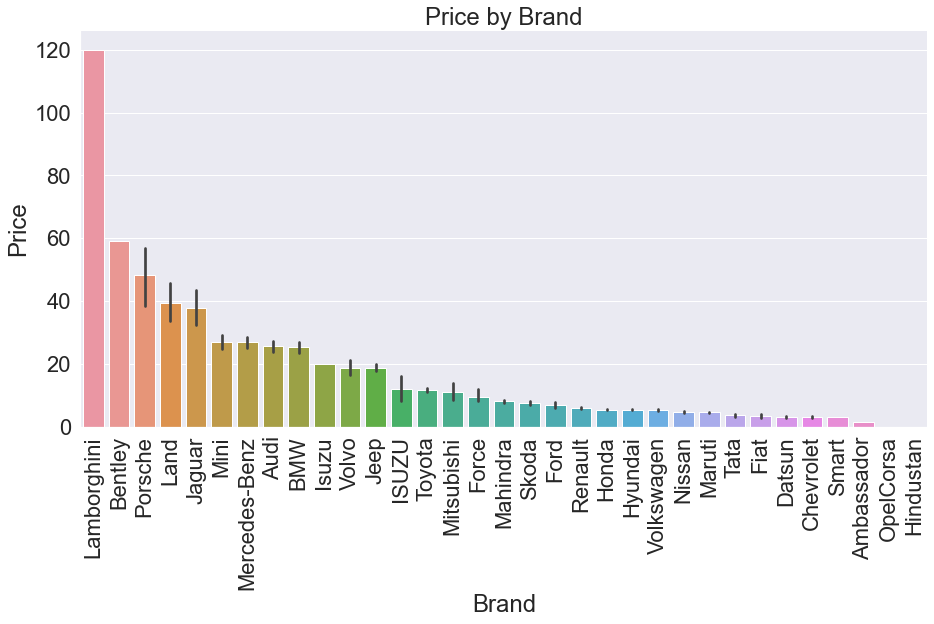

In [82]:
#Average price of cars by brand and sorting in descending order
order=df.groupby(['Brand'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#barplot
sns.catplot(x="Brand", y="Price", data=df, kind='bar', height=7, aspect=2, order=order).set(title='Price by Brand') 
plt.xticks(rotation=90)

Lamborghini,Bentley and Porshe are the most expensive with Ambassador, Opel and Hinustan being the cheapest cars.

# Price and Location

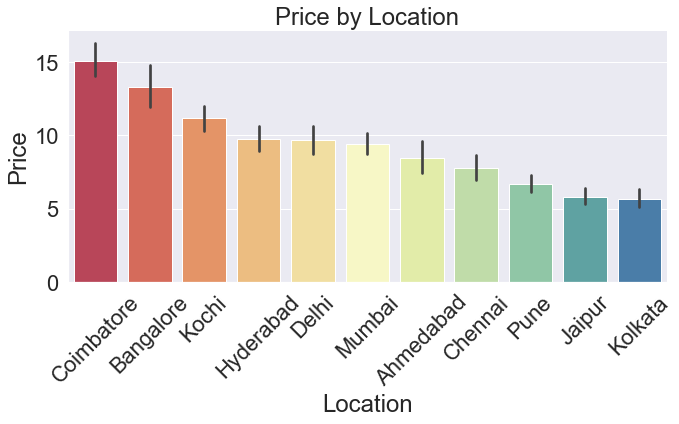

In [83]:
#Average price of cars by Location and sorting in descending order
order=df.groupby(['Location'])['Price'].mean().fillna(0).sort_values(ascending= False).index

sns.catplot(x="Location", y="Price", data=df, kind='bar', height=5, aspect=2, order=order, palette='Spectral').set(title='Price by Location') 
plt.xticks(rotation=45);

Used Cars are cheapest in Kolkata, Jaipur and most expensive in Coimbatore, Bangalore , Kochi.

# Multivariate Analysis

# Price vs Engine vs Transmission

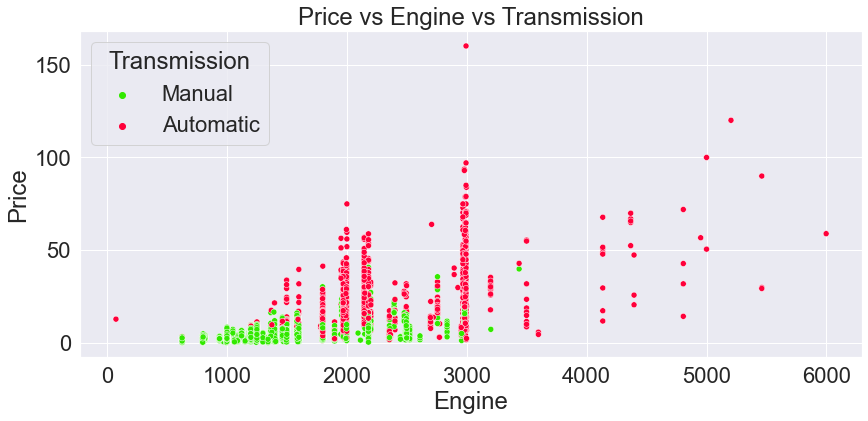

In [84]:
plt.figure(figsize=(14,6))
plt.title("Price vs Engine vs Transmission")
sns.scatterplot(x='Engine', y='Price', hue='Transmission', data=df, palette='prism')
plt.show()

As Engine Capacity increases more Automatics cars are sold at higher prices

# Price vs Power vs Transmission

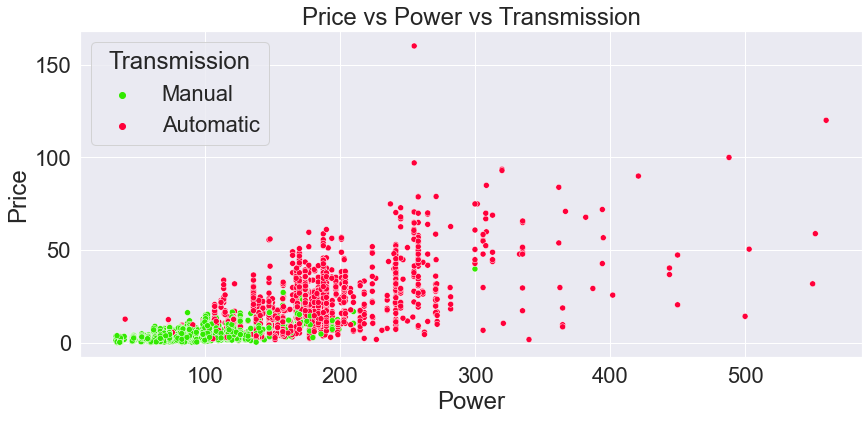

In [85]:
plt.figure(figsize=(14,6))
plt.title("Price vs Power vs Transmission")
sns.scatterplot(x='Power', y='Price', hue='Transmission', data=df, palette='prism')
plt.show()

As Power increases more Automatics cars are sold at higher prices

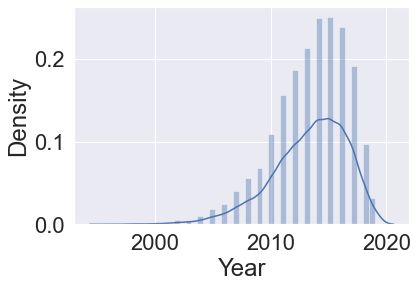

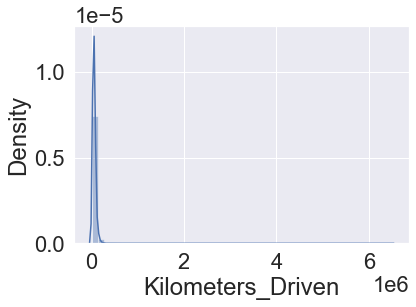

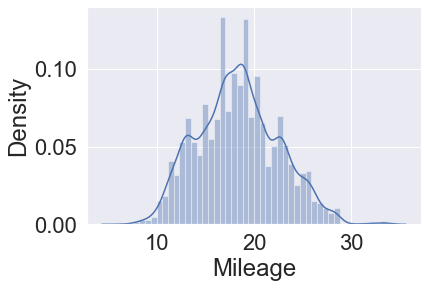

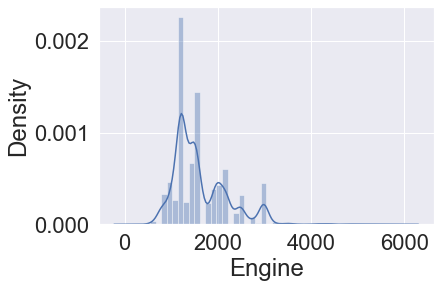

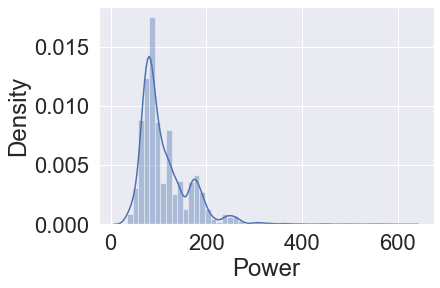

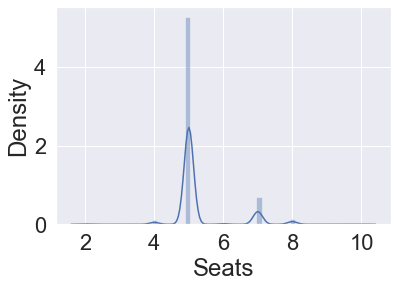

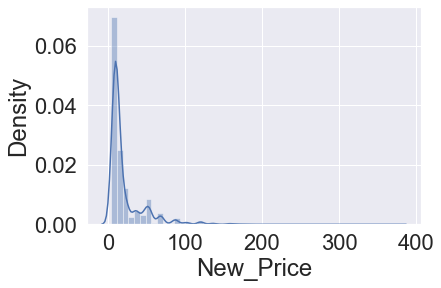

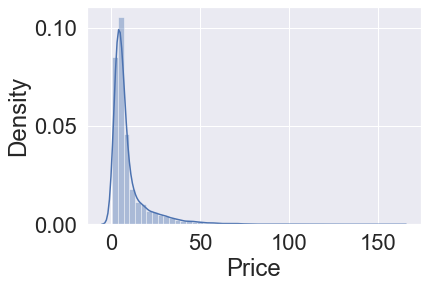

In [86]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = df.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(df[colname], kde=True)
    plt.show()

In [87]:
#Dropping NANs rows
print('Shape of file before dropping Nans :',df.shape)
df.dropna(inplace=True,axis=0)
print('Shape of file after dropping Nans :',df.shape)

Shape of file before dropping Nans : (7252, 14)
Shape of file after dropping Nans : (6019, 14)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  New_Price          6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  Model              6019 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 705.4+ KB


In [90]:
#Applying Log Transformation

df['Kilometers_Driven_Log'] = np.log(df['Kilometers_Driven'])
df['New_Price_Log'] = np.log(df['New_Price'])
df['Price_Log'] = np.log(df['Price'])
print('After applying log transformation...')
print(df.info())
print(df.isnull().sum())

After applying log transformation...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Year                   6019 non-null   int64  
 2   Kilometers_Driven      6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Mileage                6019 non-null   float64
 7   Engine                 6019 non-null   float64
 8   Power                  6019 non-null   float64
 9   Seats                  6019 non-null   float64
 10  New_Price              6019 non-null   float64
 11  Price                  6019 non-null   float64
 12  Brand                  6019 non-null   object 
 13  Model                  6019 non-null   object 
 14  Kilometers_Driven_L

In [92]:
#Dropping Model column as it has high cardinality
df.drop(['Model'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Year                   6019 non-null   int64  
 2   Kilometers_Driven      6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Mileage                6019 non-null   float64
 7   Engine                 6019 non-null   float64
 8   Power                  6019 non-null   float64
 9   Seats                  6019 non-null   float64
 10  New_Price              6019 non-null   float64
 11  Price                  6019 non-null   float64
 12  Brand                  6019 non-null   object 
 13  Kilometers_Driven_Log  6019 non-null   float64
 14  New_Price_Log          6019 non-null   float64
 15  Pric

# Model Building

In [95]:
#taking backup of transformed dataset before we proceed with model
df_model=df.copy()
df_model.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Kilometers_Driven_Log,New_Price_Log,Price_Log
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti,11.184421,1.706565,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai,10.621327,2.776332,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,10.736397,2.152924,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti,11.373663,2.422144,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi,10.613246,3.972930,2.875822


In [96]:
df_model.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'Brand', 'Kilometers_Driven_Log', 'New_Price_Log',
       'Price_Log'],
      dtype='object')

# Model 1: Using Kilometers_Driven

x = { 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'}

y = Price

In [97]:
#Defining x (independent) and y(dependent) variables
x1 = df_model[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand']]
y1 = df_model[['Price']]

display(x1.head())
display(y1.head())

print('Shape of x: ',x1.shape)
print('Shape of y: ',y1.shape)

#Creating Dummy Variables
print('\nCreating dummy variables for categorical features:')
x1 = pd.get_dummies(x1, columns=['Location', 'Fuel_Type','Transmission','Owner_Type'], drop_first=True)
x1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


Shape of x:  (6019, 11)
Shape of y:  (6019, 1)

Creating dummy variables for categorical features:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,Maruti,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,Hyundai,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,Honda,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,Maruti,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,Audi,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [98]:
#Defining x (independent) and y(dependent) variables
x1 = df_model[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand']]
y1 = df_model[['Price']]

display(x1.head())
display(y1.head())

print('Shape of x: ',x1.shape)
print('Shape of y: ',y1.shape)

#Creating Dummy Variables
print('\nCreating dummy variables for categorical features:')
x1 = pd.get_dummies(x1, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand'], drop_first=True)
x1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


Shape of x:  (6019, 11)
Shape of y:  (6019, 1)

Creating dummy variables for categorical features:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
## Evaluating Performance of Model by Generating KPIs - RMSE, MAE, MAPE, R^2, Adj R^2

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [100]:
def generate_lin_model(x,y):
    ''' Function to generate Linear Regression Model and generate the metrics '''
    #Splitting the data into Training & Test datasets
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

    #printing shape of training and test datasets
    print("x_train:",x_train.shape)
    print("x_test:",x_test.shape)
    print("y_train:",y_train.shape)
    print("y_test:",y_test.shape)
    print("\nIndependent variables for model :", x.columns)
    print("\nDependent variable for model :", y.columns)
    print("\nFitting Linear model..........")

    #Fitting Linear model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(x_train, y_train)

    print("\nLinear model complete..........\n")
    print("Intercept of the linear equation:", lin_reg_model.intercept_) 
    print("\nCoefficients of the equation are:", lin_reg_model.coef_)

    print("Generating Metrics for Model")

    # Checking model performance on train set
    print("\nTraining Performance")
    display(model_perf(lin_reg_model, x_train, y_train))

    # Checking model performance on test set
    print("\nTest Performance")
    display(model_perf(lin_reg_model, x_test, y_test)) 

In [135]:
#Generate Model 1 and Metrics
generate_lin_model(x1,y1)

x_train: (4213, 54)
x_test: (1806, 54)
y_train: (4213, 1)
y_test: (1806, 1)

Independent variables for model : Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Bra

,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,5.494778,2.968718,60.428942,0.763875,0.760809



Test Performance


,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,6.173226,2.877241,57.058536,0.679096,0.6692


# Model 2: y = Price_log

x = { 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'}

y = Price_log

In [104]:
#Defining x (independent) and y(dependent) variables
x2 = df_model[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand', 'New_Price_Log']]
y2 = df_model[['Price_Log']]

display(x2.head())
display(y2.head())

print('Shape of x: ',x2.shape)
print('Shape of y: ',y2.shape)

#Creating Dummy Variables
print('\nCreating dummy variables for categorical features:')
x2 = pd.get_dummies(x2, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand'], drop_first=True)
x2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,New_Price_Log
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,1.706565
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,2.776332
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,2.152924
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,2.422144
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,3.972930


,Price_Log
0,0.559616
1,2.525729
2,1.504077
3,1.791759
4,2.875822


Shape of x:  (6019, 12)
Shape of y:  (6019, 1)

Creating dummy variables for categorical features:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Model performance check
def model_perf_log(model, inp, out):
    '''Function to Generate KPIs if log transformation is applied on dependent variable'''
    y_pred = np.exp(model.predict(inp))   #reversing the log and applying exp function
    y_act = np.exp(out.values)            #log(y) => exp(y)

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [486]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=1)

linregmodel = LinearRegression()
linregmodel.fit(x_train, y_train)

#printing shape of training and test datasets
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("\nIndependent variables for model :", x_train.columns)
print("\nDependent variable for model :", y_train.columns)
print("\nFitting Linear model..........")

#Fitting Linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

print("\nLinear model complete..........\n")
print("Intercept of the linear equation:", lin_reg_model.intercept_) 
print("\nCoefficients of the equation are:", lin_reg_model.coef_)
print("Generating Metrics for Model")
# Checking model performance on train set
print("\nTraining Performance")
display(model_perf_log(lin_reg_model, x_train, y_train))
# Checking model performance on test set
print("\nTest Performance")
display(model_perf_log(lin_reg_model, x_test, y_test)) 

x_train: (4213, 54)
x_test: (1806, 54)
y_train: (4213, 1)
y_test: (1806, 1)

Independent variables for model : Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Bra

,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,4.356108,1.812948,19.08852,0.851599,0.849671



Test Performance


,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,3.806833,1.703059,17.815729,0.877967,0.874203


In [ ]:
Observations:
1. With our linear regression model we have been able to capture over 80 % of 
variation in our data.
2. Two seater cars are most expensive followed by 4 seater and least expensive are 10 seaters.

3. Mileage(or MPG) is inversely correlated with Price. The higher the mileage of a car the cheaper it is. This will help in allocating inventory using the population demographicsthe cheaper the price.
4. Lamborghini,Bentley and Porshe are the most expensive with Ambassador, Opel and Hinustan being the cheapest cars.
5. Used Cars are cheapest in Kolkata, Jaipur and most expensive in Coimbatore, Bangalore , Kochi.
6. As Engine Capacity increases more Automatics cars are sold at higher prices.
7. As Power increases more Automatics cars are sold at higher prices

In [ ]:
Recommendations

1. Our final Linear Regression model (Model 2) has a MAPE of 17.8% on the test data, which means that we are able to predict within 17.8% of the price value. This is better than model 1 and could be better with more feature engineering.
2. Brands like Maruti, Hyundai,Honda and Toyota are low budget and very popular brands in used car market. 
3. There should a continued focus on Automatics Cars because of the high price they sell for and potential higher profits compared to manual cars.
4. With the used car market and selling of high end cars extended warranties in addition to service package should be considered as aditional sources of income and a way to sell more cars.
5. Mumbai and Hyderbad appear to have a demand for used cars. The market should be further researched if a rental service will be profibale.
6. The most important thing which the data does not have insights to is the explosive growth in electric cars. This should be seriously looked at and efforts made to start building inventory in electric cars.